# BiLSTM Fix for Indonesia CSAD

Epoch 1/100
30/30 [==============================] - 13s 127ms/step - loss: 1.8158e-04 - val_loss: 1.0099e-04
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 1.5564e-04 - val_loss: 1.0600e-04
Epoch 3/100
30/30 [==============================] - 1s 23ms/step - loss: 1.4464e-04 - val_loss: 9.9686e-05
Epoch 4/100
30/30 [==============================] - 0s 13ms/step - loss: 1.4044e-04 - val_loss: 1.0628e-04
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 1.3585e-04 - val_loss: 1.0004e-04
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 1.3078e-04 - val_loss: 1.0639e-04
Epoch 7/100
30/30 [==============================] - 0s 14ms/step - loss: 1.4054e-04 - val_loss: 1.0697e-04
Epoch 8/100
30/30 [==============================] - 0s 13ms/step - loss: 1.4263e-04 - val_loss: 1.0479e-04
Epoch 9/100
30/30 [==============================] - 0s 14ms/step - loss: 1.3647e-04 - val_loss: 9.4210e-05
Epoch 10/100
30/30 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 2ms/step


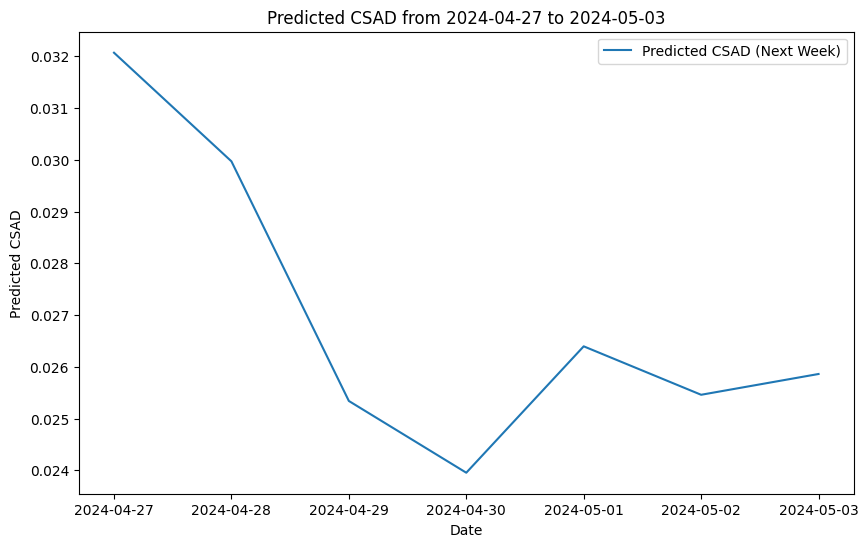

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# Load historical data
historical_data = pd.read_csv('/content/Indonesia.csv')

# Generate dates from 2025-01-01 to 2030-12-31
future_dates = pd.date_range(start='2024-04-27', end='2030-12-31', freq='D')

# Generate synthetic market returns
future_market_returns = np.random.normal(loc=0.0005, scale=0.01, size=len(future_dates))

# Create a DataFrame
future_data = pd.DataFrame({
    'Date': future_dates,
    'Market return': future_market_returns
})

# Calculate absolute market return and market return squared
future_data['Absolute market return'] = future_data['Market return'].abs()
future_data['Market return squared'] = future_data['Market return'] ** 2

# Features and target variable
X = historical_data[['Market return', 'Absolute market return', 'Market return squared']]
y = historical_data['CSAD']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for LSTM [samples, timesteps, features]
X_scaled_3d = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(1, X_scaled.shape[1])))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_scaled_3d, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Save the model and scaler
model.save('bilstm_model.h5')
joblib.dump(scaler, 'scaler.pkl')

# Load the pre-trained BiLSTM model and scaler
from tensorflow.keras.models import load_model
model = load_model('bilstm_model.h5')
scaler = joblib.load('scaler.pkl')

# Prepare future data for prediction
X_future = future_data[['Market return', 'Absolute market return', 'Market return squared']]
X_future_scaled = scaler.transform(X_future)
X_future_scaled_3d = np.reshape(X_future_scaled, (X_future_scaled.shape[0], 1, X_future_scaled.shape[1]))

# Predict future CSAD values
future_data['Predicted_CSAD'] = model.predict(X_future_scaled_3d).flatten()

# Save the predictions to a CSV file
future_data.to_csv('nama file.csv', index=False)

# Extract data for the next week
next_week_data = future_data[future_data['Date'] <= '2024-05-03']

# Plot the predicted CSAD values for the next week
plt.figure(figsize=(10, 6))
plt.plot(next_week_data['Date'], next_week_data['Predicted_CSAD'], label='Predicted CSAD (Next Week)')
plt.xlabel('Date')
plt.ylabel('Predicted CSAD')
plt.title('Predicted CSAD from 2024-04-27 to 2024-05-03')
plt.legend()
plt.show()


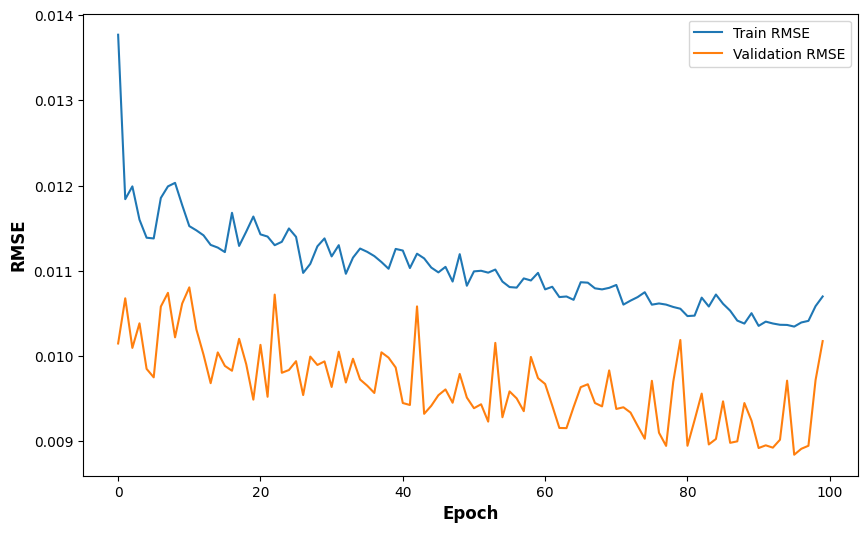

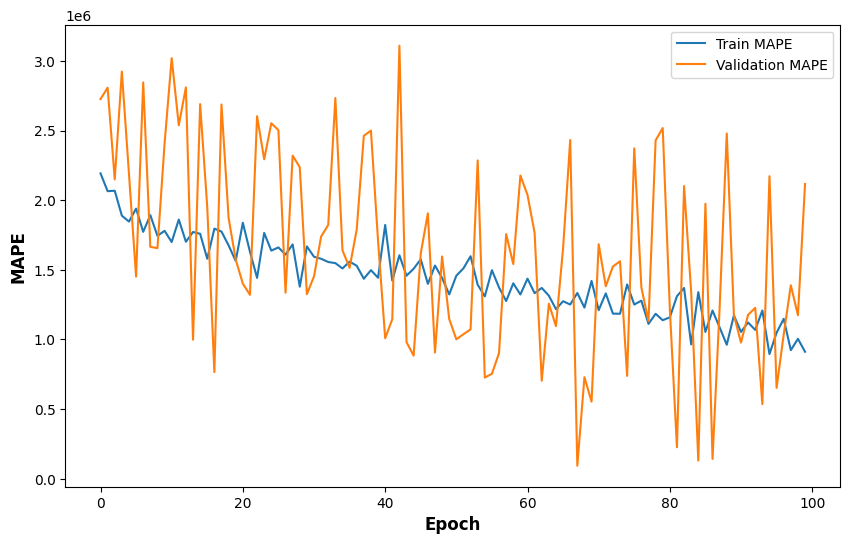

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import RootMeanSquaredError

# Load historical data
historical_data = pd.read_csv('/content/Tes/Indonesia.csv')

# Setting the seed for reproducibility
np.random.seed(42)

# Generate dates from 2025-01-01 to 2030-12-31
future_dates = pd.date_range(start='2024-04-27', end='2030-12-31', freq='D')

# Generate synthetic market returns
future_market_returns = np.random.normal(loc=0.0005, scale=0.01, size=len(future_dates))

# Create a DataFrame
future_data = pd.DataFrame({
    'Date': future_dates,
    'Market return': future_market_returns
})

# Calculate absolute market return and market return squared
future_data['Absolute market return'] = future_data['Market return'].abs()
future_data['Market return squared'] = future_data['Market return'] ** 2

# Features and target variable
X = historical_data[['Market return', 'Absolute market return', 'Market return squared']]
y = historical_data['CSAD']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for LSTM [samples, timesteps, features]
X_scaled_3d = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(1, X_scaled.shape[1])))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError(), 'mean_absolute_percentage_error'])

# Train the model
history = model.fit(X_scaled_3d, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Save the model and scaler
model.save('bilstm_model.h5')
joblib.dump(scaler, 'scaler.pkl')

# Load the pre-trained BiLSTM model and scaler
from tensorflow.keras.models import load_model
model = load_model('bilstm_model.h5')
scaler = joblib.load('scaler.pkl')

# Prepare future data for prediction
X_future = future_data[['Market return', 'Absolute market return', 'Market return squared']]
X_future_scaled = scaler.transform(X_future)
X_future_scaled_3d = np.reshape(X_future_scaled, (X_future_scaled.shape[0], 1, X_future_scaled.shape[1]))

# Predict future CSAD values
future_data['Predicted_CSAD'] = model.predict(X_future_scaled_3d).flatten()

# Save the predictions to a CSV file
future_data.to_csv('future_csad_predictions.csv', index=False)

# # Plotting the training history
# Plot mean squared error values
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.ylabel('RMSE', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

# Plot mean absolute percentage error values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.ylabel('MAPE', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.show()


# Loop For All Country

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# Direktori untuk data historis dan data masa depan
historical_data_dir = 'G:\\My Drive\\Research\\Book Chapter w Bu Silvi\\CSAD\\Historical Data'
future_data_dir = 'G:\\My Drive\\Research\\Book Chapter w Bu Silvi\\CSAD\\Future Data'

# Fungsi untuk memproses setiap file
def process_file(file_path, output_dir):
    # Load historical data
    historical_data = pd.read_csv(file_path)

    # Generate dates from 2025-01-01 to 2030-12-31
    future_dates = pd.date_range(start='2024-04-27', end='2030-12-31', freq='D')

    # Generate synthetic market returns
    future_market_returns = np.random.normal(loc=0.0005, scale=0.01, size=len(future_dates))

    # Create a DataFrame
    future_data = pd.DataFrame({
        'Date': future_dates,
        'Market return': future_market_returns
    })

    # Calculate absolute market return and market return squared
    future_data['Absolute market return'] = future_data['Market return'].abs()
    future_data['Market return squared'] = future_data['Market return'] ** 2

    # Features and target variable
    X = historical_data[['Market return', 'Absolute market return', 'Market return squared']]
    y = historical_data['CSAD']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Reshape data to 3D for LSTM [samples, timesteps, features]
    X_scaled_3d = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

    # Build the BiLSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(1, X_scaled.shape[1])))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    model.fit(X_scaled_3d, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Save the model and scaler with the name of the file
    base_file_name = os.path.basename(file_path).split('.')[0]
    model_file = os.path.join(output_dir, f'{base_file_name}_bilstm_model.h5')
    scaler_file = os.path.join(output_dir, f'{base_file_name}_scaler.pkl')
    model.save(model_file)
    joblib.dump(scaler, scaler_file)

    # Load the pre-trained BiLSTM model and scaler
    model = load_model(model_file)
    scaler = joblib.load(scaler_file)

    # Prepare future data for prediction
    X_future = future_data[['Market return', 'Absolute market return', 'Market return squared']]
    X_future_scaled = scaler.transform(X_future)
    X_future_scaled_3d = np.reshape(X_future_scaled, (X_future_scaled.shape[0], 1, X_future_scaled.shape[1]))

    # Predict future CSAD values
    future_data['Predicted_CSAD'] = model.predict(X_future_scaled_3d).flatten()

    # Save the predictions to a CSV file
    output_file = os.path.join(output_dir, f'{base_file_name}_predictions.csv')
    future_data.to_csv(output_file, index=False)

    # Extract data for the next week
    next_week_data = future_data[future_data['Date'] <= '2024-05-03']

    # Plot the predicted CSAD values for the next week
    plt.figure(figsize=(10, 6))
    plt.plot(next_week_data['Date'], next_week_data['Predicted_CSAD'], label='Predicted CSAD (Next Week)')
    plt.xlabel('Date')
    plt.ylabel('Predicted CSAD')
    plt.title(f'Predicted CSAD for 1 week in {base_file_name}')
    plt.legend()

    # Save the plot to the output directory
    plot_file = os.path.join(output_dir, f'{base_file_name}_plot.png')
    plt.savefig(plot_file)
    plt.close()

# Loop through each file in the directory
for file_name in os.listdir(historical_data_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(historical_data_dir, file_name)
        process_file(file_path, future_data_dir)


c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 2.5083e-04 - val_loss: 1.2768e-04
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5895e-04 - val_loss: 9.8895e-05
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2927e-04 - val_loss: 1.1157e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3577e-04 - val_loss: 9.9898e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3313e-04 - val_loss: 9.7801e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5223e-04 - val_loss: 1.0096e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3193e-04 - val_loss: 1.0937e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4056e-04 - val_loss: 1.0836e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3045e-04 - val_loss: 1.0407e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3047e-04 - val_loss: 9.6251e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 1.7335e-04 - val_loss: 5.1860e-05
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5334e-05 - val_loss: 2.4710e-05
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9237e-05 - val_loss: 2.4855e-05
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2223e-05 - val_loss: 2.0575e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6101e-05 - val_loss: 2.1366e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6525e-05 - val_loss: 2.0566e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6438e-05 - val_loss: 2.3666e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4675e-05 - val_loss: 2.0370e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0194e-05 - val_loss: 2.4676e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1283e-05 - val_loss: 2.0497e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 2.0472e-04 - val_loss: 1.6445e-04
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9044e-04 - val_loss: 1.3602e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4088e-04 - val_loss: 1.3368e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2552e-04 - val_loss: 1.6896e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5910e-04 - val_loss: 1.4761e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0017e-04 - val_loss: 1.5054e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5531e-04 - val_loss: 1.6435e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4222e-04 - val_loss: 1.3840e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7460e-04 - val_loss: 1.4786e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9437e-04 - val_loss: 1.3514e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0011 - val_loss: 7.1351e-05
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8386e-04 - val_loss: 7.5746e-05
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5170e-05 - val_loss: 7.1043e-05
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7402e-05 - val_loss: 7.1037e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4473e-05 - val_loss: 8.0594e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3729e-05 - val_loss: 7.4367e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.2086e-05 - val_loss: 7.2747e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3442e-05 - val_loss: 7.3451e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0169e-05 - val_loss: 7.2461e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6738e-05 - val_loss: 7.0745e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6067e-05 

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 1.6423e-04 - val_loss: 7.8074e-05
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2437e-04 - val_loss: 7.2381e-05
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3874e-04 - val_loss: 6.9420e-05
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0035e-04 - val_loss: 7.8162e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1551e-04 - val_loss: 8.2877e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2078e-04 - val_loss: 8.0002e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1713e-04 - val_loss: 9.2994e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3722e-04 - val_loss: 6.6503e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0493e-04 - val_loss: 7.1168e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0654e-04 - val_loss: 7.5155e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1636e

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


c:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 2.2772e-04 - val_loss: 9.0092e-05
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.3117e-05 - val_loss: 6.9954e-05
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4572e-05 - val_loss: 5.8786e-05
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4396e-05 - val_loss: 6.1806e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0890e-04 - val_loss: 5.7374e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1770e-05 - val_loss: 5.5089e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8667e-05 - val_loss: 5.7185e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5872e-05 - val_loss: 5.9348e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5910e-05 - val_loss: 6.1963e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1980e-05 - val_loss: 5.8481e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


## Plot All

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Create a new directory for plots
os.makedirs('plots', exist_ok=True)

# List of countries
countries = ['Indonesia', 'Malaysia', 'Phillipines', 'Singapore', 'Thailand', 'Vietnam']

# Loop through each country
for country in countries:
    # Load historical data
    historical_data = pd.read_csv(f'/content/Tes/{country}.csv')

    # Setting the seed for reproducibility
    np.random.seed(42)

    # Generate dates from 2025-01-01 to 2030-12-31
    future_dates = pd.date_range(start='2024-04-27', end='2030-12-31', freq='D')

    # Generate synthetic market returns
    future_market_returns = np.random.normal(loc=0.0005, scale=0.01, size=len(future_dates))

    # Create a DataFrame
    future_data = pd.DataFrame({
        'Date': future_dates,
        'Market return': future_market_returns
    })

    # Calculate absolute market return and market return squared
    future_data['Absolute market return'] = future_data['Market return'].abs()
    future_data['Market return squared'] = future_data['Market return'] ** 2

    # Features and target variable
    X = historical_data[['Market return', 'Absolute market return', 'Market return squared']]
    y = historical_data['CSAD']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Reshape data to 3D for LSTM [samples, timesteps, features]
    X_scaled_3d = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

    # Build the BiLSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(1, X_scaled.shape[1])))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError(), 'mean_absolute_percentage_error'])

    # Train the model
    history = model.fit(X_scaled_3d, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Save the model and scaler
    model.save(f'bilstm_model_{country}.h5')
    joblib.dump(scaler, f'scaler_{country}.pkl')

    # Load the pre-trained BiLSTM model and scaler
    model = load_model(f'bilstm_model_{country}.h5')
    scaler = joblib.load(f'scaler_{country}.pkl')

    # Prepare future data for prediction
    X_future = future_data[['Market return', 'Absolute market return', 'Market return squared']]
    X_future_scaled = scaler.transform(X_future)
    X_future_scaled_3d = np.reshape(X_future_scaled, (X_future_scaled.shape[0], 1, X_future_scaled.shape[1]))

    # Predict future CSAD values
    future_data['Predicted_CSAD'] = model.predict(X_future_scaled_3d).flatten()

    # Save the predictions to a CSV file
    future_data.to_csv(f'future_csad_predictions_{country}.csv', index=False)

    # Plot mean squared error values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
    plt.ylabel('RMSE', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.legend(loc='upper right')
    # plt.title(f'{country} - RMSE')
    plt.savefig(f'plots/{country}_rmse.png')
    plt.close()

    # Plot mean absolute percentage error values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE')
    plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
    plt.ylabel('MAPE', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.legend(loc='upper right')
    # plt.title(f'{country} - MAPE')
    plt.savefig(f'plots/{country}_mape.png')
    plt.close()


Epoch 1/100
30/30 [==============================] - 10s 99ms/step - loss: 1.8666e-04 - root_mean_squared_error: 0.0137 - mean_absolute_percentage_error: 2638386.0000 - val_loss: 1.1301e-04 - val_root_mean_squared_error: 0.0106 - val_mean_absolute_percentage_error: 2891584.7500
Epoch 2/100
30/30 [==============================] - 1s 45ms/step - loss: 1.3899e-04 - root_mean_squared_error: 0.0118 - mean_absolute_percentage_error: 2113885.2500 - val_loss: 1.0022e-04 - val_root_mean_squared_error: 0.0100 - val_mean_absolute_percentage_error: 1868485.6250
Epoch 3/100
30/30 [==============================] - 1s 22ms/step - loss: 1.3873e-04 - root_mean_squared_error: 0.0118 - mean_absolute_percentage_error: 1827628.8750 - val_loss: 1.0566e-04 - val_root_mean_squared_error: 0.0103 - val_mean_absolute_percentage_error: 1986037.8750
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 1.3227e-04 - root_mean_squared_error: 0.0115 - mean_absolute_percentage_error: 2064338.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 2ms/step
Epoch 1/100
30/30 [==============================] - 11s 64ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - mean_absolute_percentage_error: 3341305.7500 - val_loss: 7.1693e-05 - val_root_mean_squared_error: 0.0085 - val_mean_absolute_percentage_error: 2212226.5000
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 1.6847e-04 - root_mean_squared_error: 0.0130 - mean_absolute_percentage_error: 1658459.8750 - val_loss: 7.0765e-05 - val_root_mean_squared_error: 0.0084 - val_mean_absolute_percentage_error: 1326841.5000
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 7.5213e-05 - root_mean_squared_error: 0.0087 - mean_absolute_percentage_error: 1864444.7500 - val_loss: 7.0370e-05 - val_root_mean_squared_error: 0.0084 - val_mean_absolute_percentage_error: 1705499.6250
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 7.1776e-05 - root_mean_squared_error: 0.0085 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 3ms/step
Epoch 1/100
30/30 [==============================] - 10s 70ms/step - loss: 1.4024e-04 - root_mean_squared_error: 0.0118 - mean_absolute_percentage_error: 1997227.5000 - val_loss: 6.9149e-05 - val_root_mean_squared_error: 0.0083 - val_mean_absolute_percentage_error: 2421933.5000
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 1.1736e-04 - root_mean_squared_error: 0.0108 - mean_absolute_percentage_error: 1488744.8750 - val_loss: 8.3283e-05 - val_root_mean_squared_error: 0.0091 - val_mean_absolute_percentage_error: 3347888.2500
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 1.2681e-04 - root_mean_squared_error: 0.0113 - mean_absolute_percentage_error: 1389648.3750 - val_loss: 7.2974e-05 - val_root_mean_squared_error: 0.0085 - val_mean_absolute_percentage_error: 2731186.0000
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1974e-04 - root_mean_squared_error: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 3s 3ms/step
Epoch 1/100
30/30 [==============================] - 11s 77ms/step - loss: 7.5005e-05 - root_mean_squared_error: 0.0087 - mean_absolute_percentage_error: 1356524.2500 - val_loss: 2.5955e-05 - val_root_mean_squared_error: 0.0051 - val_mean_absolute_percentage_error: 274400.0000
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 3.7796e-05 - root_mean_squared_error: 0.0061 - mean_absolute_percentage_error: 1023441.5625 - val_loss: 2.5144e-05 - val_root_mean_squared_error: 0.0050 - val_mean_absolute_percentage_error: 1595745.2500
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 2.9268e-05 - root_mean_squared_error: 0.0054 - mean_absolute_percentage_error: 932775.0625 - val_loss: 2.1238e-05 - val_root_mean_squared_error: 0.0046 - val_mean_absolute_percentage_error: 873134.8125
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 3.0395e-05 - root_mean_squared_error: 0.005

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 3ms/step
Epoch 1/100
30/30 [==============================] - 10s 71ms/step - loss: 2.2488e-04 - root_mean_squared_error: 0.0150 - mean_absolute_percentage_error: 1974628.1250 - val_loss: 3.6247e-04 - val_root_mean_squared_error: 0.0190 - val_mean_absolute_percentage_error: 876517.6875
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 1.8294e-04 - root_mean_squared_error: 0.0135 - mean_absolute_percentage_error: 1881732.8750 - val_loss: 1.3685e-04 - val_root_mean_squared_error: 0.0117 - val_mean_absolute_percentage_error: 1599011.5000
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 1.5677e-04 - root_mean_squared_error: 0.0125 - mean_absolute_percentage_error: 1682287.6250 - val_loss: 1.4095e-04 - val_root_mean_squared_error: 0.0119 - val_mean_absolute_percentage_error: 2720045.7500
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 1.5292e-04 - root_mean_squared_error: 0.01

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 3ms/step
Epoch 1/100
30/30 [==============================] - 10s 97ms/step - loss: 1.1222e-04 - root_mean_squared_error: 0.0106 - mean_absolute_percentage_error: 1815935.2500 - val_loss: 6.6260e-05 - val_root_mean_squared_error: 0.0081 - val_mean_absolute_percentage_error: 2144241.5000
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 8.9273e-05 - root_mean_squared_error: 0.0094 - mean_absolute_percentage_error: 1734103.7500 - val_loss: 6.6734e-05 - val_root_mean_squared_error: 0.0082 - val_mean_absolute_percentage_error: 2012259.2500
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 9.5504e-05 - root_mean_squared_error: 0.0098 - mean_absolute_percentage_error: 1692046.6250 - val_loss: 7.7229e-05 - val_root_mean_squared_error: 0.0088 - val_mean_absolute_percentage_error: 1561825.0000
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 9.8801e-05 - root_mean_squared_error: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 2s 2ms/step


## Ziping

In [9]:
import shutil

# Define the folder to be zipped and the name of the zip file
folder_to_zip = '/content/plots'
zip_filename = '/content/plots.zip'

# Create a zip file
shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', folder_to_zip)


'/content/plots.zip'